## В данной работе исследуется решение жёсткой системы методом Розенброка

Рассматривается простейшая мат. модель хим. реакции Белоусова - Жаботинского (модель Филда-Нойса "орегонатор"):   
$$ \dot{y_1} = 77.27 \cdot (y_2 + y_1(1-8.375 \cdot 10^{-6} \cdot y_1 - y_2)) $$  
$$\dot{y_2} = \dfrac{1}{77.27} \cdot (y_3 - (1+y_1)y_2) $$   
$$\dot{y_3} =  0.161 \cdot (y_1 - y_3)  $$
Скорости изменения концентраций $y_1, y_2, y_3$ значительно отличаются, на что указывают, например, коэффициенты 77.27, 0.167, $\dfrac{1}{77.27}$, (они существенно отличаются по порядку), из чего легко предположить, что собственные числа такой системы также существенно отличаются по порядку, что указывает на её жёсткость по определению    
Начальные условия выбираем близкими к нулю (поскольку изначально концентрации веществ примерно одинаковы)

## Используем 3-х стадийный метод Розенброка:
$y_{n+1} = y_n + p_1 k_1 + p_2 k_2 + p_3 k_3$

где $k_1, k_2, k_3:$

$D_n k_1 = h f(x_n, y_n)$   
$D_n k_2 = h f(x_n + \beta_{21}h, y_n + \beta_{21}k_1)$    
$D_n k_3 = h f(x_n + (\beta_{31} + \beta_{32})h, y_n + \beta_{31}k_1 + \beta_{32} k_2)$  

$D_n = E - ah \dfrac{\partial f}{\partial y}(x_n, y_n)$

значения параметров:$
a = 0.435866521508459 \\
p_1 = 0.435866521508459 \\     
p_2 = 0.478240833274518  \\ 
p_3 = 0.085892645217022    \\ 
\beta_{21} = 0.435866521508459 \\    
\beta_{31} = 0.435866521508459   \\ 
\beta_{32} = -2.116053335949810   \\  $

In [83]:
import numpy as np
from matplotlib import pyplot as plt

In [200]:
a = 0.435866521508459
beta_21 = a
beta_31 = a

beta    = a * (6 * a * a - 3 * a + 2) / (6 * a * a - 6 * a + 1)

beta_32 = beta - a
p1 = a
p3 = (6 * a * a - 6 * a + 1) / (6 * a * (beta - a))
p2 = (1 - 2 * a - 2 * beta * p_3) / (2 * a)

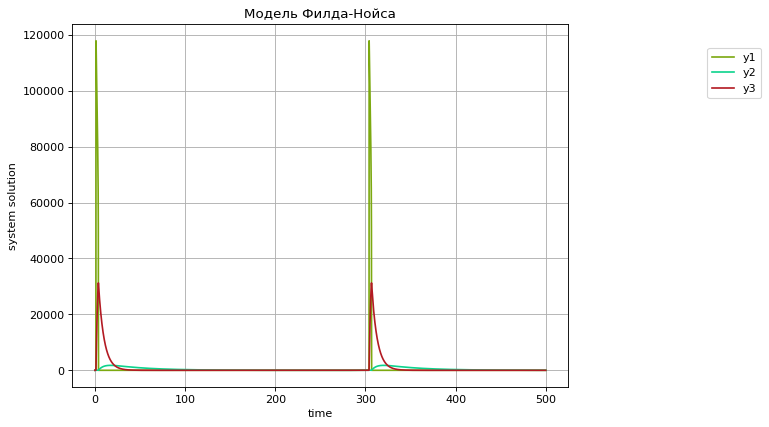

In [209]:
E = np.diag(np.ones(3))
def calc_jac(y):
    jac = np.matrix([[77.27 - 0.0012942725 * y[0] - 77.27 * y[1], (1-y[0])*77.27, 0 ],
                     [-y[1]/77.27                             ,-(1+y[0])/77.27   , 1/77.27 ],
                     [0.161                                 , 0              , -0.161] ])
    return jac
def f1(y):
    return 77.27*(y[1] + y[0]*(1 - 8.375 * 10**(-6)*y[0] - y[1]))
def f2(y):
    return 1/77.27 * (y[2] - (1+y[0])*y[1])
def f3(y):
    return 0.161 * (y[0] - y[2])

def f_col_k1(y):
    return np.array([f1(y), f2(y), f3(y)])
def f_col_k2(y, k1):
    y = y + beta_21 * k1
    return np.array([f1(y), f2(y), f3(y)])
def f_col_k3(y, k1, k2):
    y = y + beta_31 * k1 + beta_32 * k2
    return np.array([f1(y), f2(y), f3(y)])


y = np.array([1, 1, 1])
y_table = np.array([[1, 1, 1]])
h = 0.001
iter = 500000
for i in range(iter-1):
    D_n = E - a*h*calc_jac(y)
    k1 = np.linalg.solve(D_n, h * f_col_k1(y))
    k2 = np.linalg.solve(D_n, h * f_col_k2(y, k1))
    k3 = np.linalg.solve(D_n, h * f_col_k3(y, k1, k2))
    y = y + p1*k1 + p2*k2 + p3*k3
    y_table = np.append(y_table, [y], axis = 0)
    if i % (iter // 100) == 0:
        print(f"\r{1 + int(i / iter * 100)}%", end='\r')
        
y_table = y_table.transpose()    
time = np.arange(0, iter*h, h)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(time, y_table[0], label = "y1", color = np.random.rand(3))
plt.plot(time, y_table[1], label = "y2", color = np.random.rand(3))
plt.plot(time, y_table[2], label = "y3", color = np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
        
plt.xlabel("time")
plt.ylabel("system solution")
plt.title("Модель Филда-Нойса")
plt.grid()
plt.show()

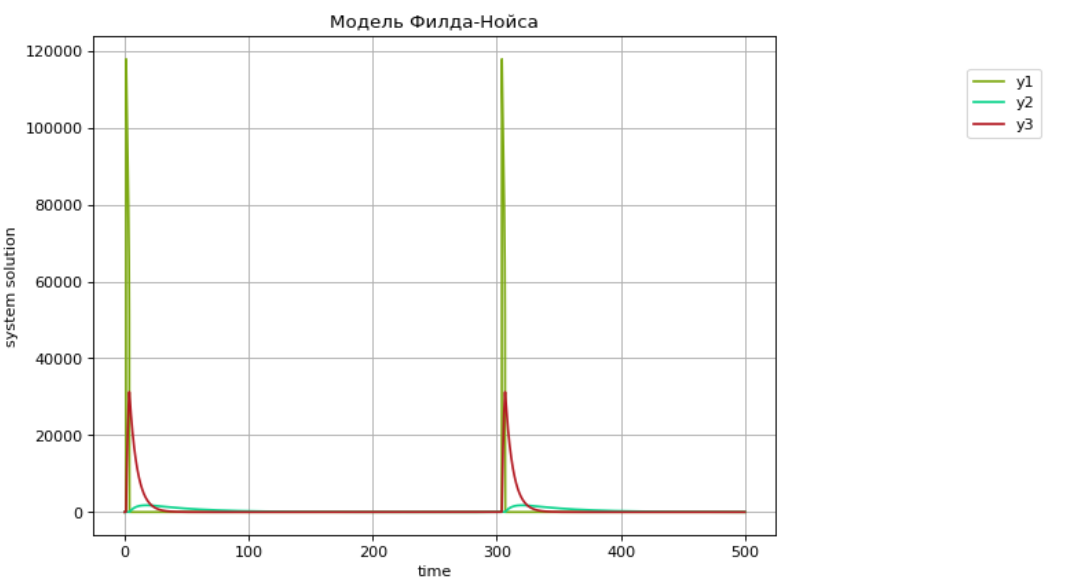

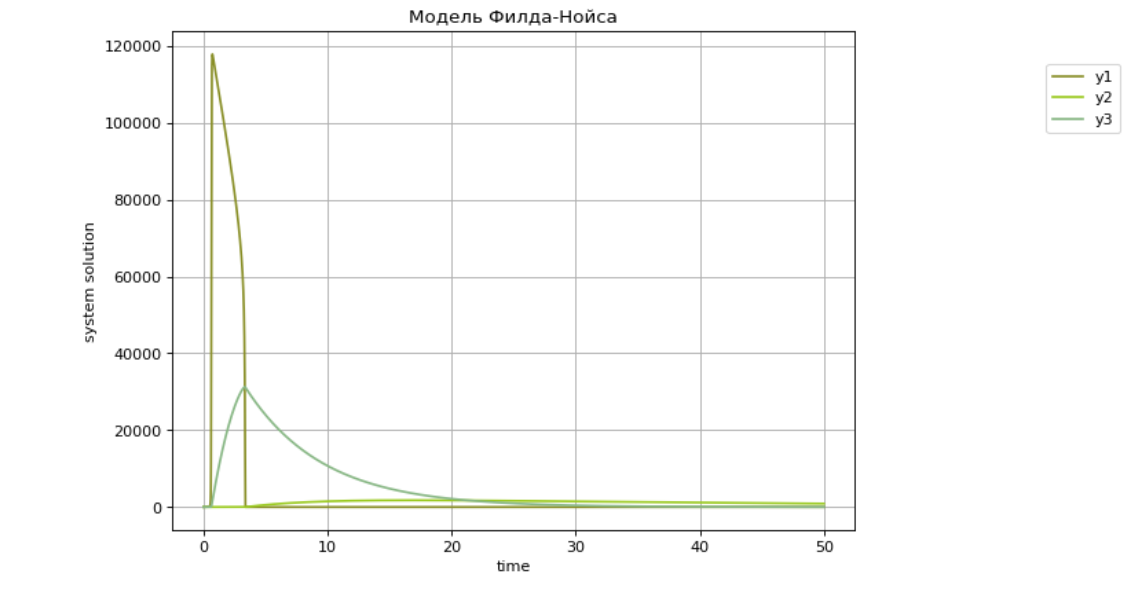

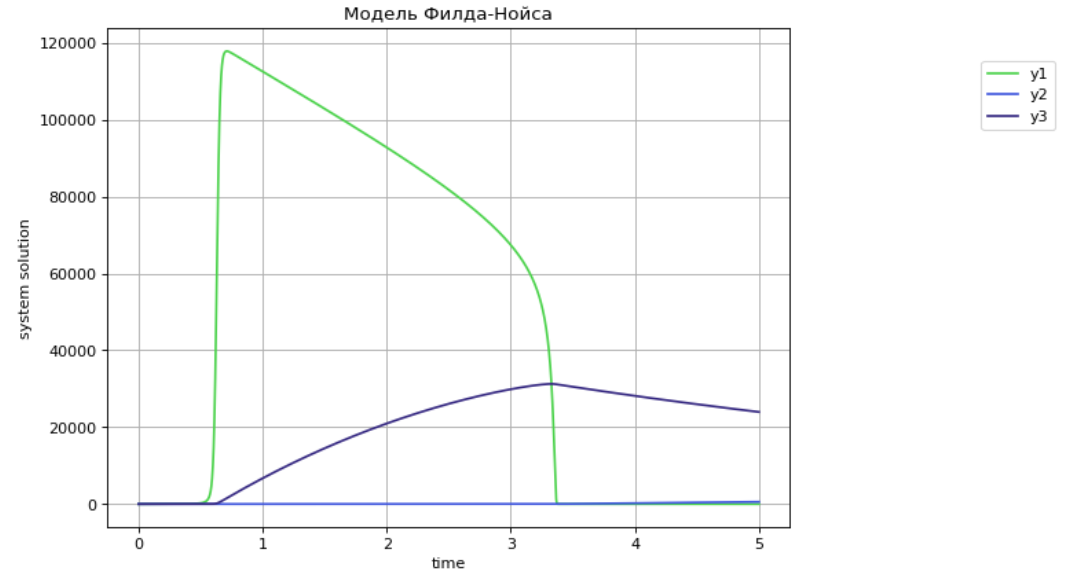

### Таким образом, найдено решение, удовлетворяющее данной жёсткой системе. Действительно, концентрация первого вещества меняется стремительно. Кроме того, полученное решение периодично